<a href="https://colab.research.google.com/github/danielecaliari/AML/blob/main/modelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from scipy import sparse
from tensorflow import keras
from keras import backend as K

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/MyDrive/"
base_dir = root_dir + 'progetto_AML/'

Mounted at /content/drive


In [4]:
label = pd.read_csv(base_dir + 'label.csv')
label = label['price'].values

Regression without embeddings

In [ ]:
from scipy import sparse
train = sparse.load_npz(base_dir + 'train.npz')
#test = sparse.load_npz(base_dir + 'test.npz')

In [27]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
def create_mlp(dim):
	# define our MLP network
  model = Sequential()
  model.add(Dense(128, input_dim=dim, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(1, activation="linear"))
  return model

Split in training & validation & test

In [ ]:
(train, test, label_train, label_test) = train_test_split(train , label , test_size=0.10, random_state=42)

(train, validation, label_train, label_validation) = train_test_split(train , label_train , test_size=0.25, random_state=42)

In [ ]:
model = create_mlp(train.shape[1])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               5863936   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 5,874,305
Trainable params: 5,874,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.RMSprop(0.00001)
model.compile(loss=root_mean_squared_error, optimizer=opt)
n_epochs = 20

history = model.fit(x=train, y=label_train, validation_data=(validation, label_validation), epochs=n_epochs, batch_size=256)

Epoch 1/20
3907/3907 [==============================] - 167s 42ms/step - loss: 2.0855 - val_loss: 0.5982
Epoch 2/20
3907/3907 [==============================] - 163s 42ms/step - loss: 0.5651 - val_loss: 0.5166
Epoch 3/20
3907/3907 [==============================] - 166s 42ms/step - loss: 0.5086 - val_loss: 0.4965
Epoch 4/20
3907/3907 [==============================] - 164s 42ms/step - loss: 0.4916 - val_loss: 0.4869
Epoch 5/20
3907/3907 [==============================] - 163s 42ms/step - loss: 0.4819 - val_loss: 0.4808
Epoch 6/20
3907/3907 [==============================] - 163s 41ms/step - loss: 0.4748 - val_loss: 0.4760
Epoch 7/20
3907/3907 [==============================] - 166s 42ms/step - loss: 0.4698 - val_loss: 0.4722
Epoch 8/20
3907/3907 [==============================] - 163s 42ms/step - loss: 0.4658 - val_loss: 0.4690
Epoch 9/20
3907/3907 [==============================] - 162s 41ms/step - loss: 0.4617 - val_loss: 0.4662
Epoch 10/20
3907/3907 [==============================] 

In [74]:
def plot_history(network_history, n_epochs):
    x_plot = list(range(1,n_epochs))
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'][1:])
    plt.plot(x_plot, network_history.history['val_loss'][1:])
    plt.legend(['Training', 'Validation'])

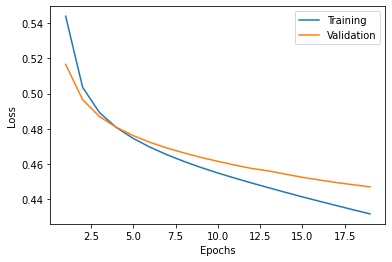

In [ ]:
plot_history(history, n_epochs)

Prediction

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[2.097319 ],
       [4.093194 ],
       [3.0012586],
       ...,
       [3.0855687],
       [3.5047834],
       [2.4942253]], dtype=float32)

In [ ]:
#final_preds = np.expm1(preds)
import math
from sklearn.metrics import mean_squared_error
final_score_model1 = math.sqrt(mean_squared_error(label_test, preds))

In [ ]:
final_score_model1

0.445868244741334

Word embedding

In [6]:
#train non text features
train_emb = sparse.load_npz(base_dir + 'train_emb.npz')
#test non text features
#test_emb = sparse.load_npz(base_dir + 'test_emb.npz')

In [7]:
#train for embeddings
train_names = pd.read_csv(base_dir + 'names.csv', index_col=0)['name']
train_descriptions = pd.read_csv(base_dir + 'descriptions.csv', index_col=0)['item_description'].astype(str)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:

#keep 10% of train_emb as test
(train_emb, test_emb, label_train_emb, label_test_emb) = train_test_split(train_emb, label, test_size=0.10, shuffle= False)
#25% of train_emb for validation
(train_emb, validation_emb, label_train_emb, label_validation_emb) = train_test_split(train_emb, label_train_emb, test_size=0.25, shuffle= False)

#keep 10% of names as test
(train_names, test_names) = train_test_split(train_names, test_size=0.10, shuffle= False) 
(train_names, train_names_validation) = train_test_split(train_names, test_size=0.25, shuffle= False) 
#keep 10% of descriptions as test
(train_descriptions, test_descriptions) = train_test_split(train_descriptions, test_size=0.10, shuffle= False)
(train_descriptions, train_descriptions_validation) = train_test_split(train_descriptions, test_size=0.25, shuffle= False)

TOKENIZE

In [9]:
def make_list(input_list):
  output_list = []
  for n in input_list:
    output_list.append(n)
  return output_list

In [10]:
names = make_list(train_names)
descriptions = make_list(train_descriptions)
names_validation = make_list(train_names_validation)
descriptions_validation = make_list(train_descriptions_validation)
names_test = make_list(test_names)
descriptions_test = make_list(test_descriptions)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def tokenize(text, nb_words):
  tokenizer = Tokenizer(nb_words=nb_words)
  tokenizer.fit_on_texts(text)
  sequences = tokenizer.texts_to_sequences(text)

  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))

  return (word_index, pad_sequences(sequences, maxlen=20))


In [17]:
#tokenize train names
word_index_names, names_data = tokenize(names, 100000)
#tokenize train descriptions
word_index_descriptions, descriptions_data = tokenize(descriptions, 100000)
#tokenize validation names
word_index_names_val, names_data_validation = tokenize(names_validation, 100000)
#tokenize validation descriptions
word_index_descriptions_val, descriptions_data_validation = tokenize(descriptions_validation, 100000)
#tokenize test names
word_index_names_test, names_data_test = tokenize(names_test, 100000)
#tokenize test descriptions
word_index_descriptions_test, descriptions_data_test = tokenize(descriptions_test, 100000)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 94718 unique tokens.
Found 131435 unique tokens.
Found 51380 unique tokens.
Found 75569 unique tokens.
Found 33165 unique tokens.
Found 51720 unique tokens.


MODEL

In [89]:
def embedding_model():
  num_words_name = len(word_index_names)  # Size of vocabulary obtained when preprocessing text data
  num_words_description = len(word_index_descriptions)  # Size of vocabulary obtained when preprocessing text data

  #input layers
  name_input = keras.Input(shape=(names_data.shape[1]), name="name")  # Variable-length sequence of ints
  description_input = keras.Input(shape=(descriptions_data.shape[1]), name="description")  # Variable-length sequence of ints
  other_features_input = keras.Input(shape=(train_emb.shape[1],), name="other_features_input")

  #embedding
  # Embed each word in the title into a 64-dimensional vector
  name_features = keras.layers.Embedding(num_words_name + 1, 64)(name_input)
  # Embed each word in the text into a 64-dimensional vector
  description_features = keras.layers.Embedding(num_words_description + 1, 128)(description_input)

  #flatten
  name_features_flattened = keras.layers.Flatten()(name_features)
  description_features_flattened = keras.layers.Flatten()(description_features)

  other_features_relu = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(other_features_input)

  # Merge all available features into a single large vector via concatenation
  x = keras.layers.concatenate([name_features_flattened, description_features_flattened, other_features_relu])


  # Stick a logistic regression for priority prediction on top of the features
  price_dense = keras.layers.Dense(128, activation="relu", name="price1")(x)
  drop = keras.layers.Dropout(0.2)(price_dense)
  price_dense2 = keras.layers.Dense(64, activation="relu", name="price2", kernel_regularizer=keras.regularizers.l2(0.001))(drop)
  price_dense3 = keras.layers.Dense(32, activation="relu", name="price2", kernel_regularizer=keras.regularizers.l2(0.001))(price_dense2)
  price_pred = keras.layers.Dense(1, activation="linear", name="price",kernel_regularizer=keras.regularizers.l2(0.001))(price_dense2)
  # Instantiate an end-to-end model predicting both priority and department
  model = keras.Model(
      inputs=[name_input, description_input, other_features_input],
      outputs=[price_pred],
  )
  return model

In [90]:
embedding_model = embedding_model()

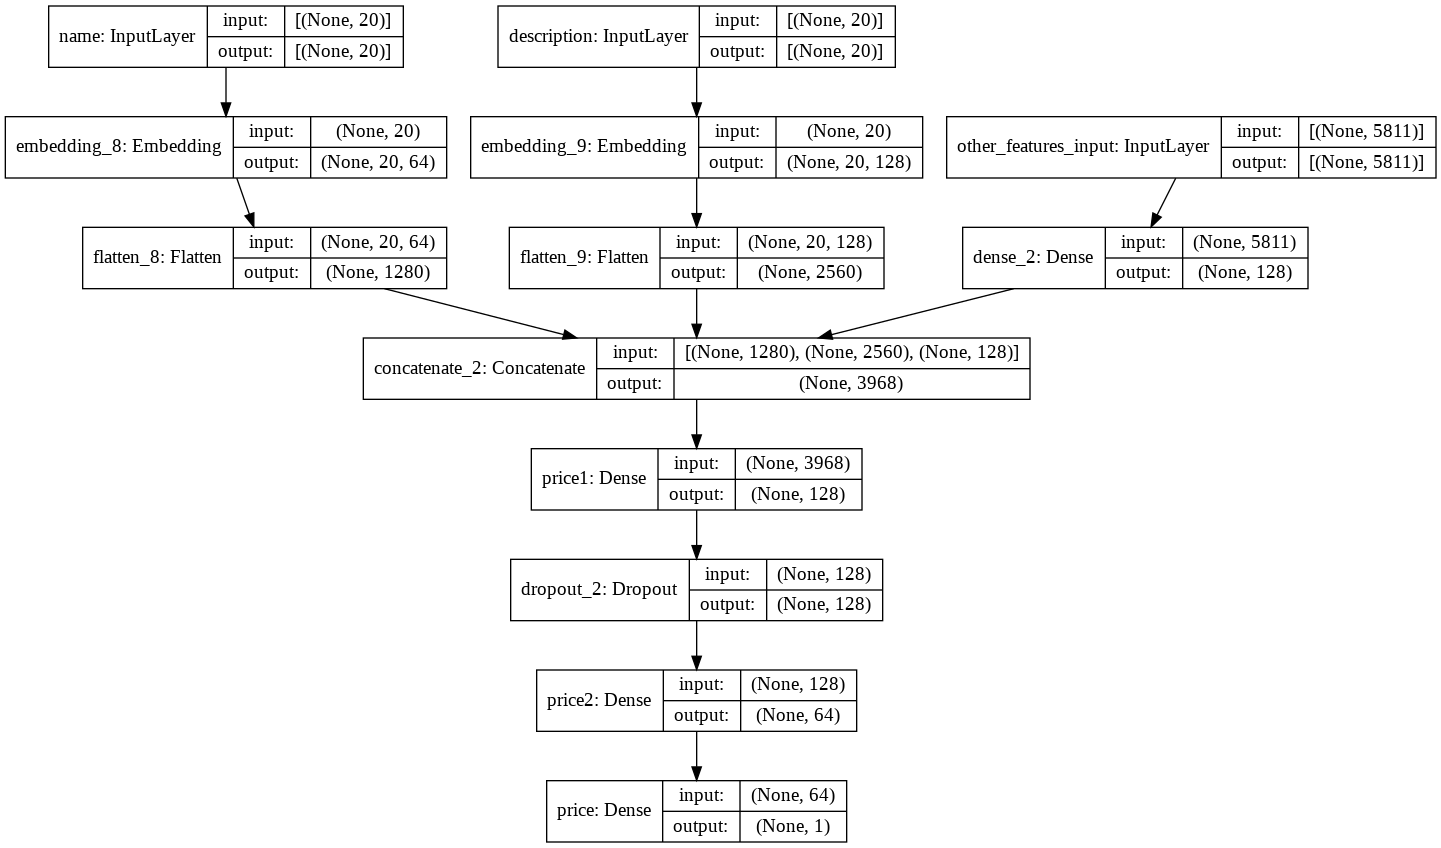

In [42]:
keras.utils.plot_model(embedding_model, "my_first_model_with_shape_info.png", show_shapes=True)

In [58]:
embedding_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
name (InputLayer)               [(None, 20)]         0                                            
__________________________________________________________________________________________________
description (InputLayer)        [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 64)       6062016     name[0][0]                       
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 20, 128)      16823808    description[0][0]                
____________________________________________________________________________________________

In [91]:
embedding_model.compile(
    optimizer=keras.optimizers.RMSprop(0.00001),
    loss={
        "price": root_mean_squared_error,
    }
)

In [92]:
n_epochs = 4
history_emb = embedding_model.fit(
    {"name": names_data, "description": descriptions_data, "other_features_input": train_emb},
    {"price": label_train_emb},
    validation_data=((names_data_validation, descriptions_data_validation, validation_emb), label_validation_emb),
    epochs=n_epochs,
    batch_size=256,
)

Epoch 1/4
3907/3907 [==============================] - 511s 130ms/step - loss: 1.5743 - val_loss: 0.6830
Epoch 2/4
3907/3907 [==============================] - 533s 136ms/step - loss: 0.6510 - val_loss: 0.6435
Epoch 3/4
3907/3907 [==============================] - 542s 138ms/step - loss: 0.5924 - val_loss: 0.6334
Epoch 4/4
3907/3907 [==============================] - 539s 138ms/step - loss: 0.5650 - val_loss: 0.6341


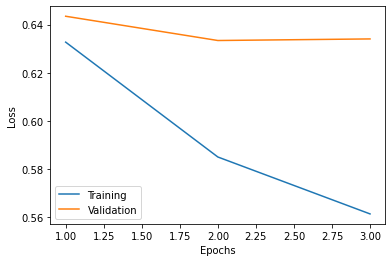

In [93]:
plot_history(history_emb, n_epochs)

In [94]:
res = embedding_model.predict((names_data_test,descriptions_data_test,test_emb))

In [95]:
final_score_model2 = math.sqrt(mean_squared_error(label_test_emb, res))

In [96]:
final_score_model2

0.6006056825864389

In [86]:
K.clear_session()